In [2]:
#Author(s): Jose Torres-Vargas
from CSVInterface import featRead
import pandas as pd
import seaborn as sns

In [3]:
reader = featRead()

In [4]:
reader.listFrames()

features
album
track
artist
set
echo_audio_feat
echo_meta_data
echo_social_feat
genres


In [5]:
features = reader.getFrame('features')
tracks = reader.getFrame('track')

#append the track column
features['genre'] = tracks['genre_top']
#get the small subset
features = reader.getSubset(features, 'small')

In [6]:
#print out root genres
print(features['genre'].unique())

#set new genres
features['newLabels'] = 'None'
features.loc[features['genre'] == 'Folk', 'newLabels'] = 'GenreA'
features.loc[features['genre'] == 'Instrumental', 'newLabels'] = 'GenreA'

features.loc[features['genre'] == 'Rock', 'newLabels'] = 'GenreB'

features.loc[features['genre'] == 'Pop', 'newLabels'] = 'GenreC'
features.loc[features['genre'] == 'Experimental', 'newLabels'] = 'GenreC'

features.loc[features['genre'] == 'Hip-Hop', 'newLabels'] = 'GenreD'
features.loc[features['genre'] == 'Electronic', 'newLabels'] = 'GenreD'

features.loc[features['genre'] == 'International', 'newLabels'] = 'GenreE'


['Hip-Hop' 'Pop' 'Folk' 'Experimental' 'Rock' 'International' 'Electronic'
 'Instrumental']


In [7]:
chroma = features[['chroma_cens', 'newLabels']]
chromaFeat = chroma.loc[:, ('chroma_cens', 'mean', '01'):('chroma_cens', 'mean', '09')]
chromaFeat['newLabels'] = chroma['newLabels']

## Genre A: Reflective and Complex: Folk and Instrumental

## Genre B: Intense and Rebellious: Rock

## Genre C: Upbeat and Conventional: Pop, Experimental

## Genre D: Energetic adn Rythmic: Hip-Hop, Electronic

## Genre E: Other: International

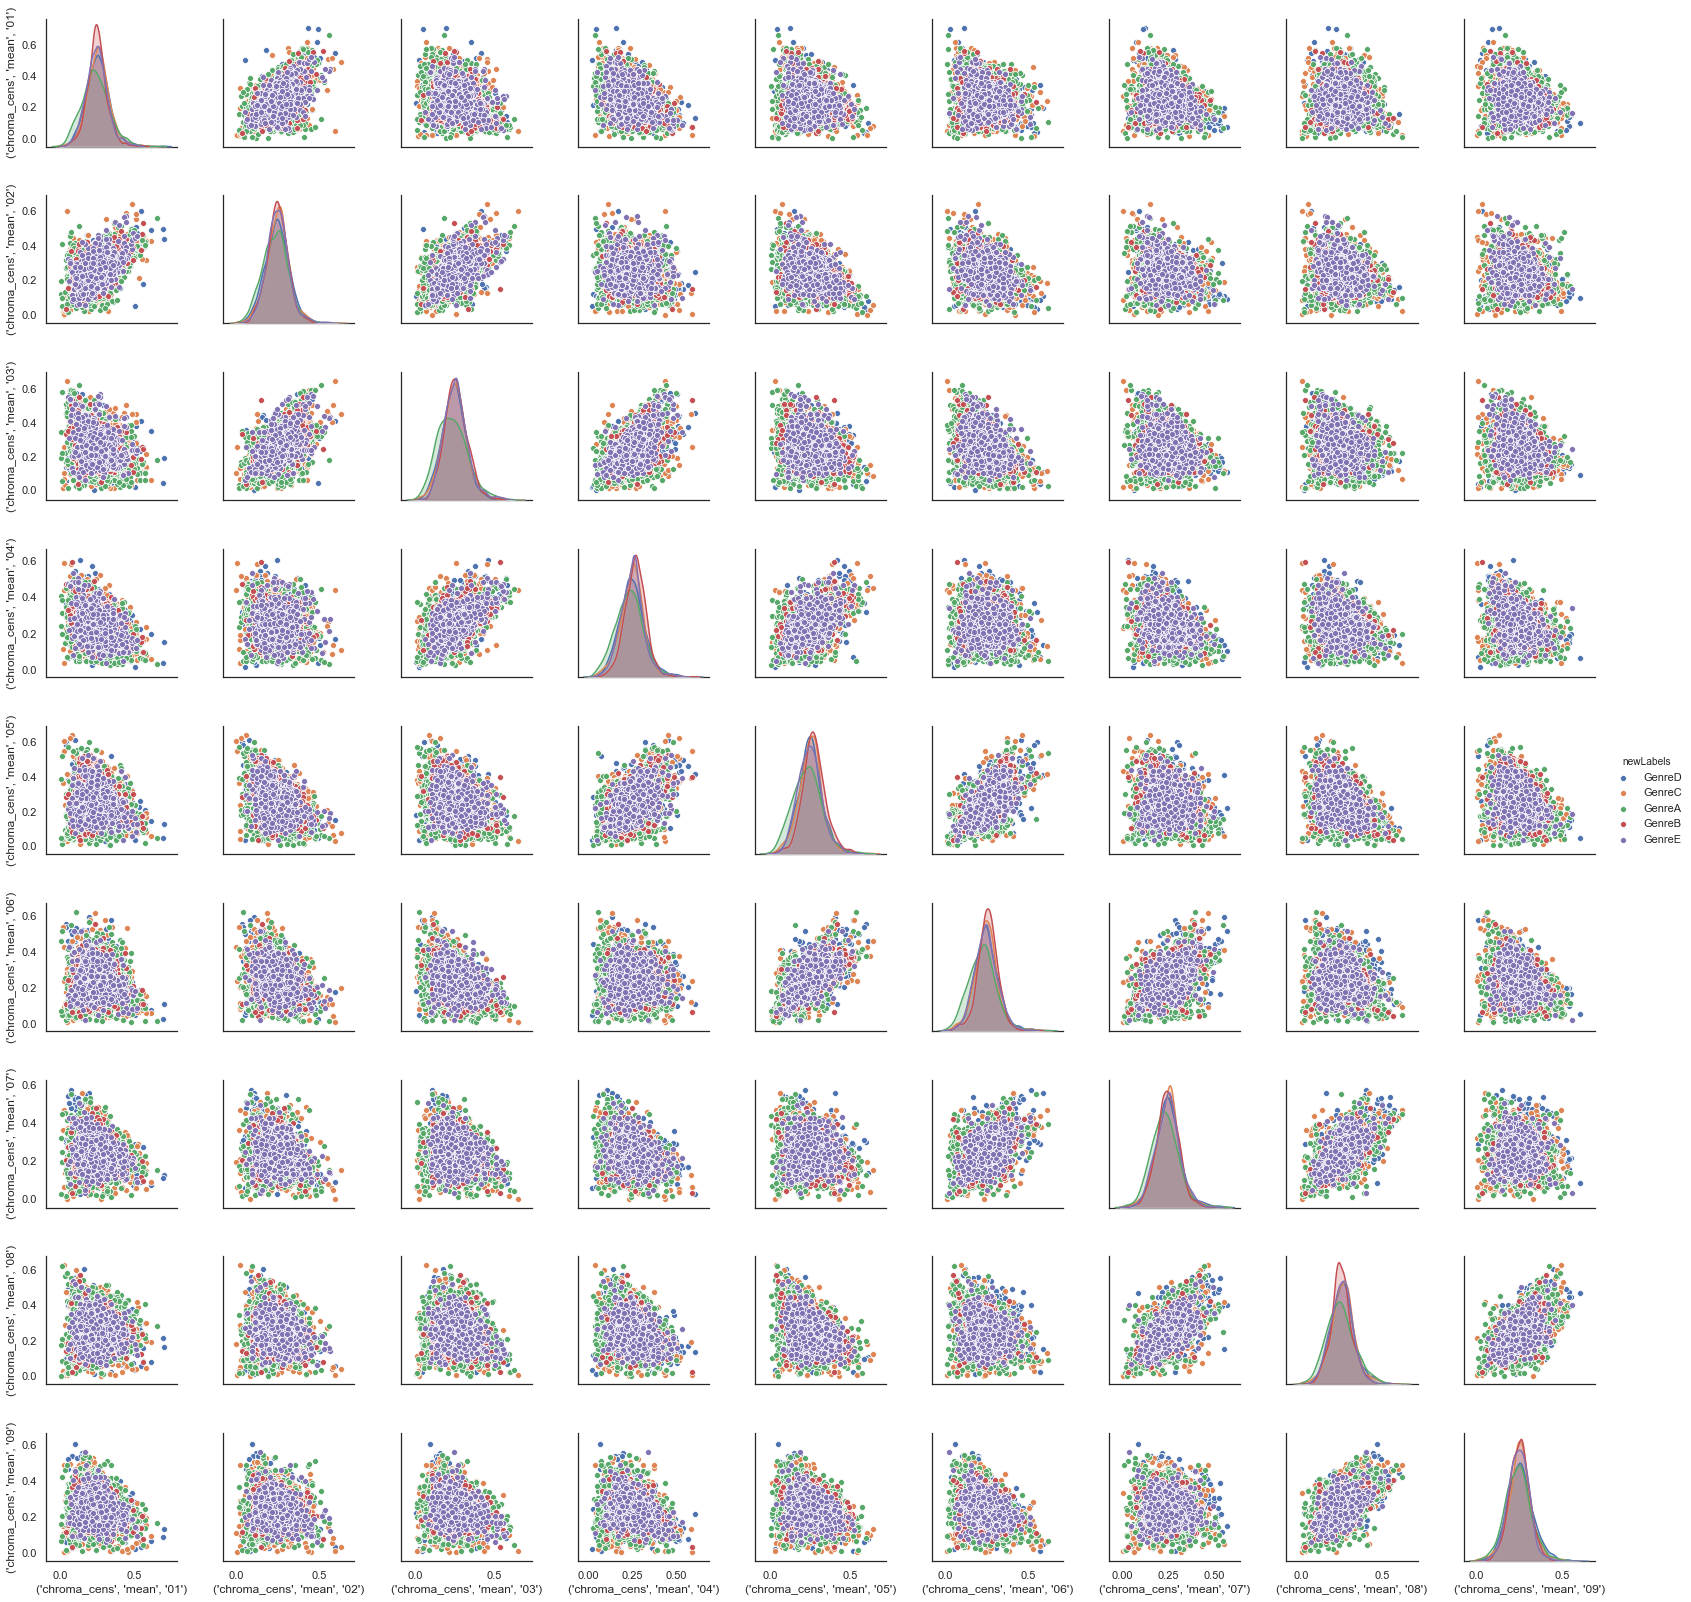

In [8]:
sns.set(style='white', color_codes=True)
sns.pairplot(chromaFeat, hue='newLabels')


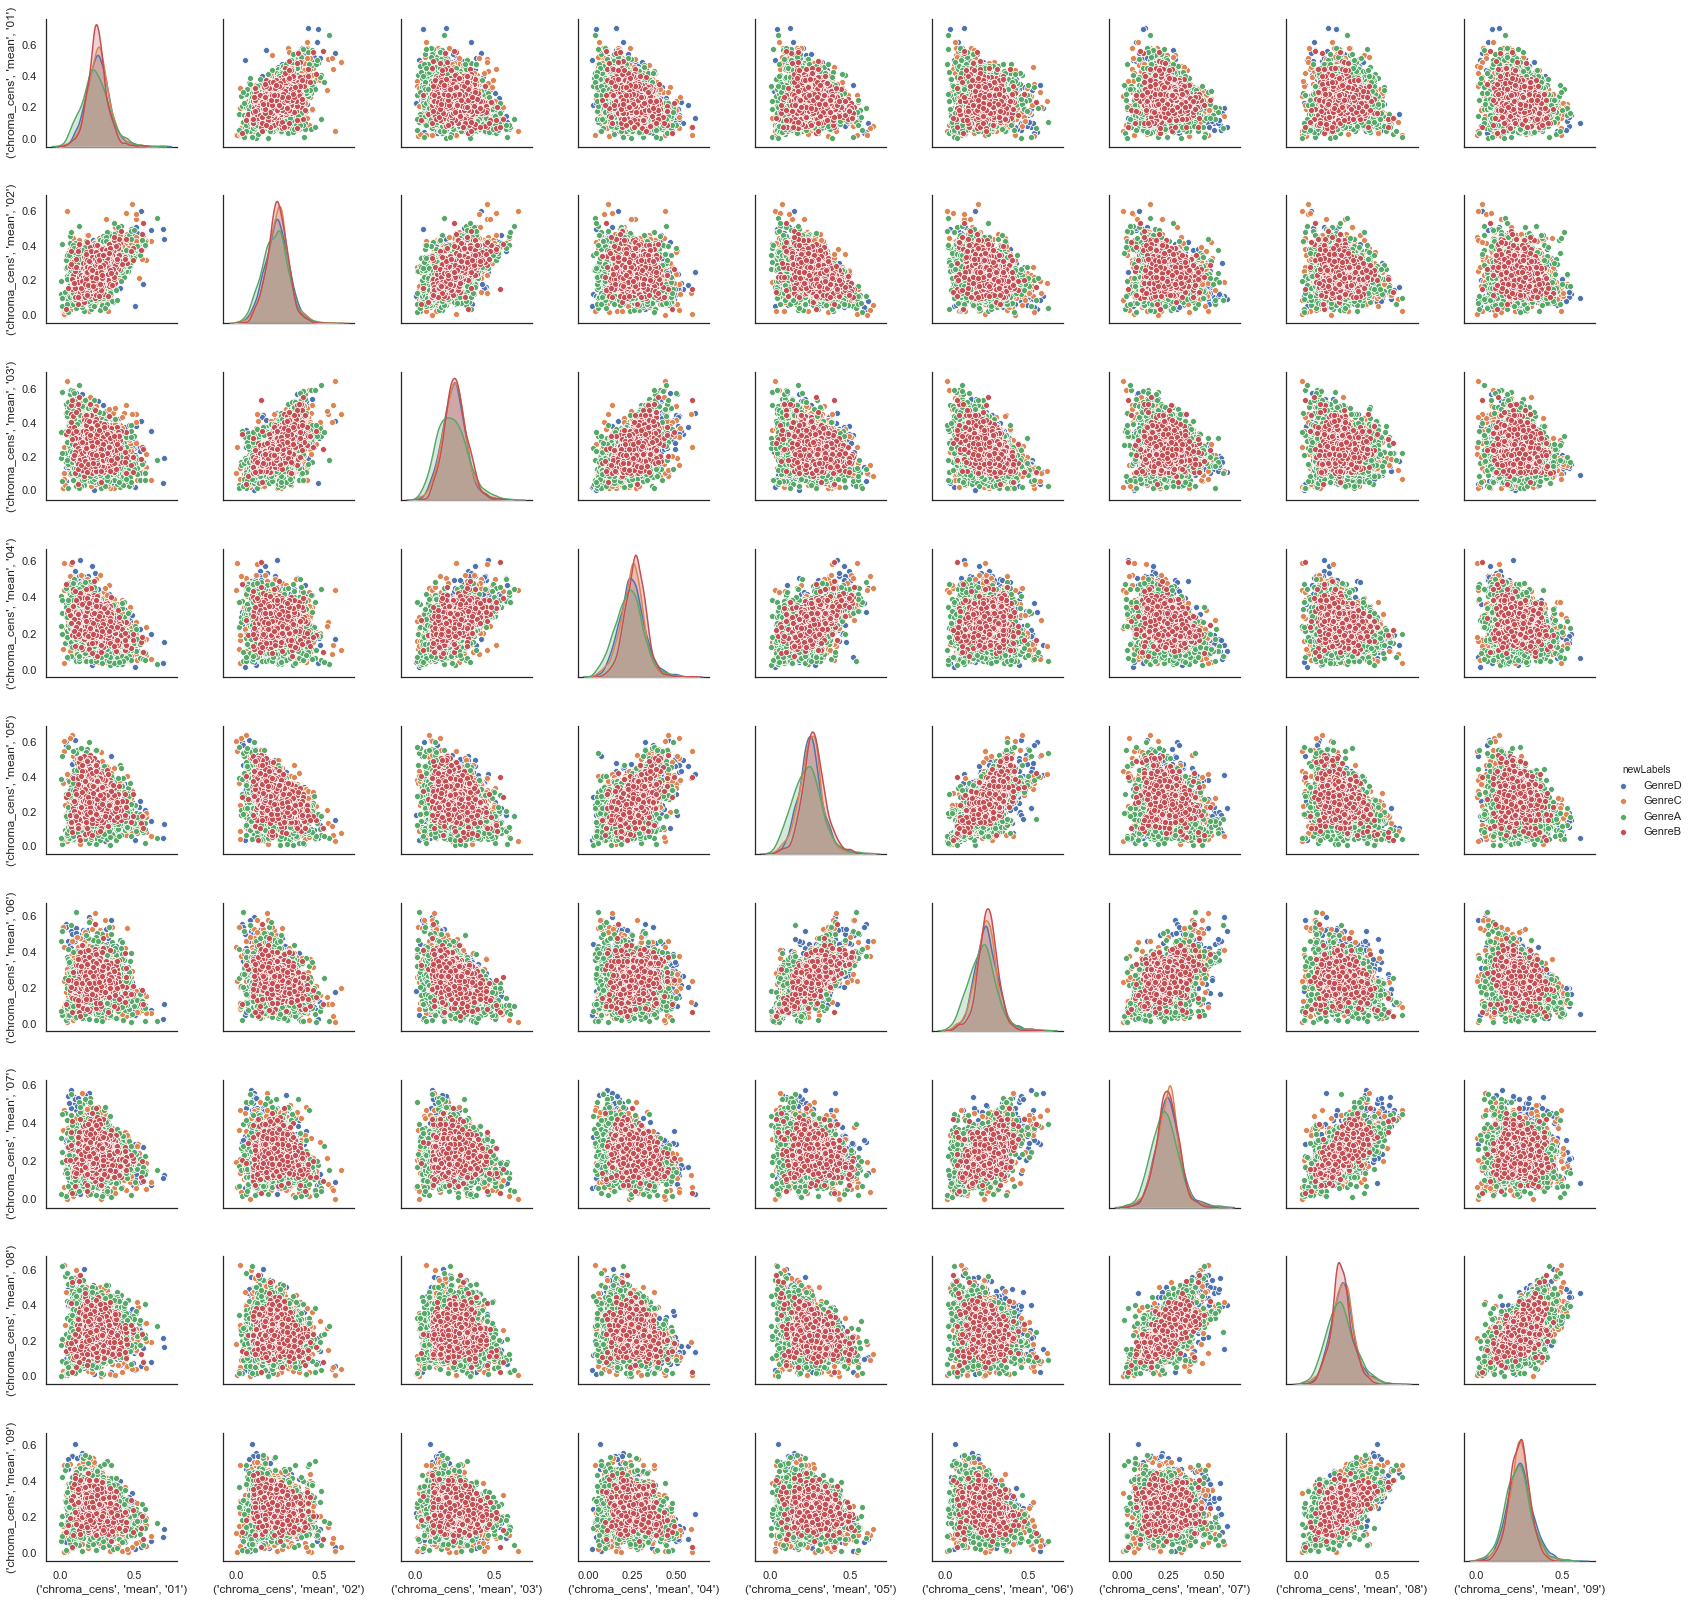

In [9]:
#Drop international(GenreE)
chromaFeat = chromaFeat.loc[chromaFeat['newLabels'] != 'GenreE']
sns.pairplot(chromaFeat, hue='newLabels')

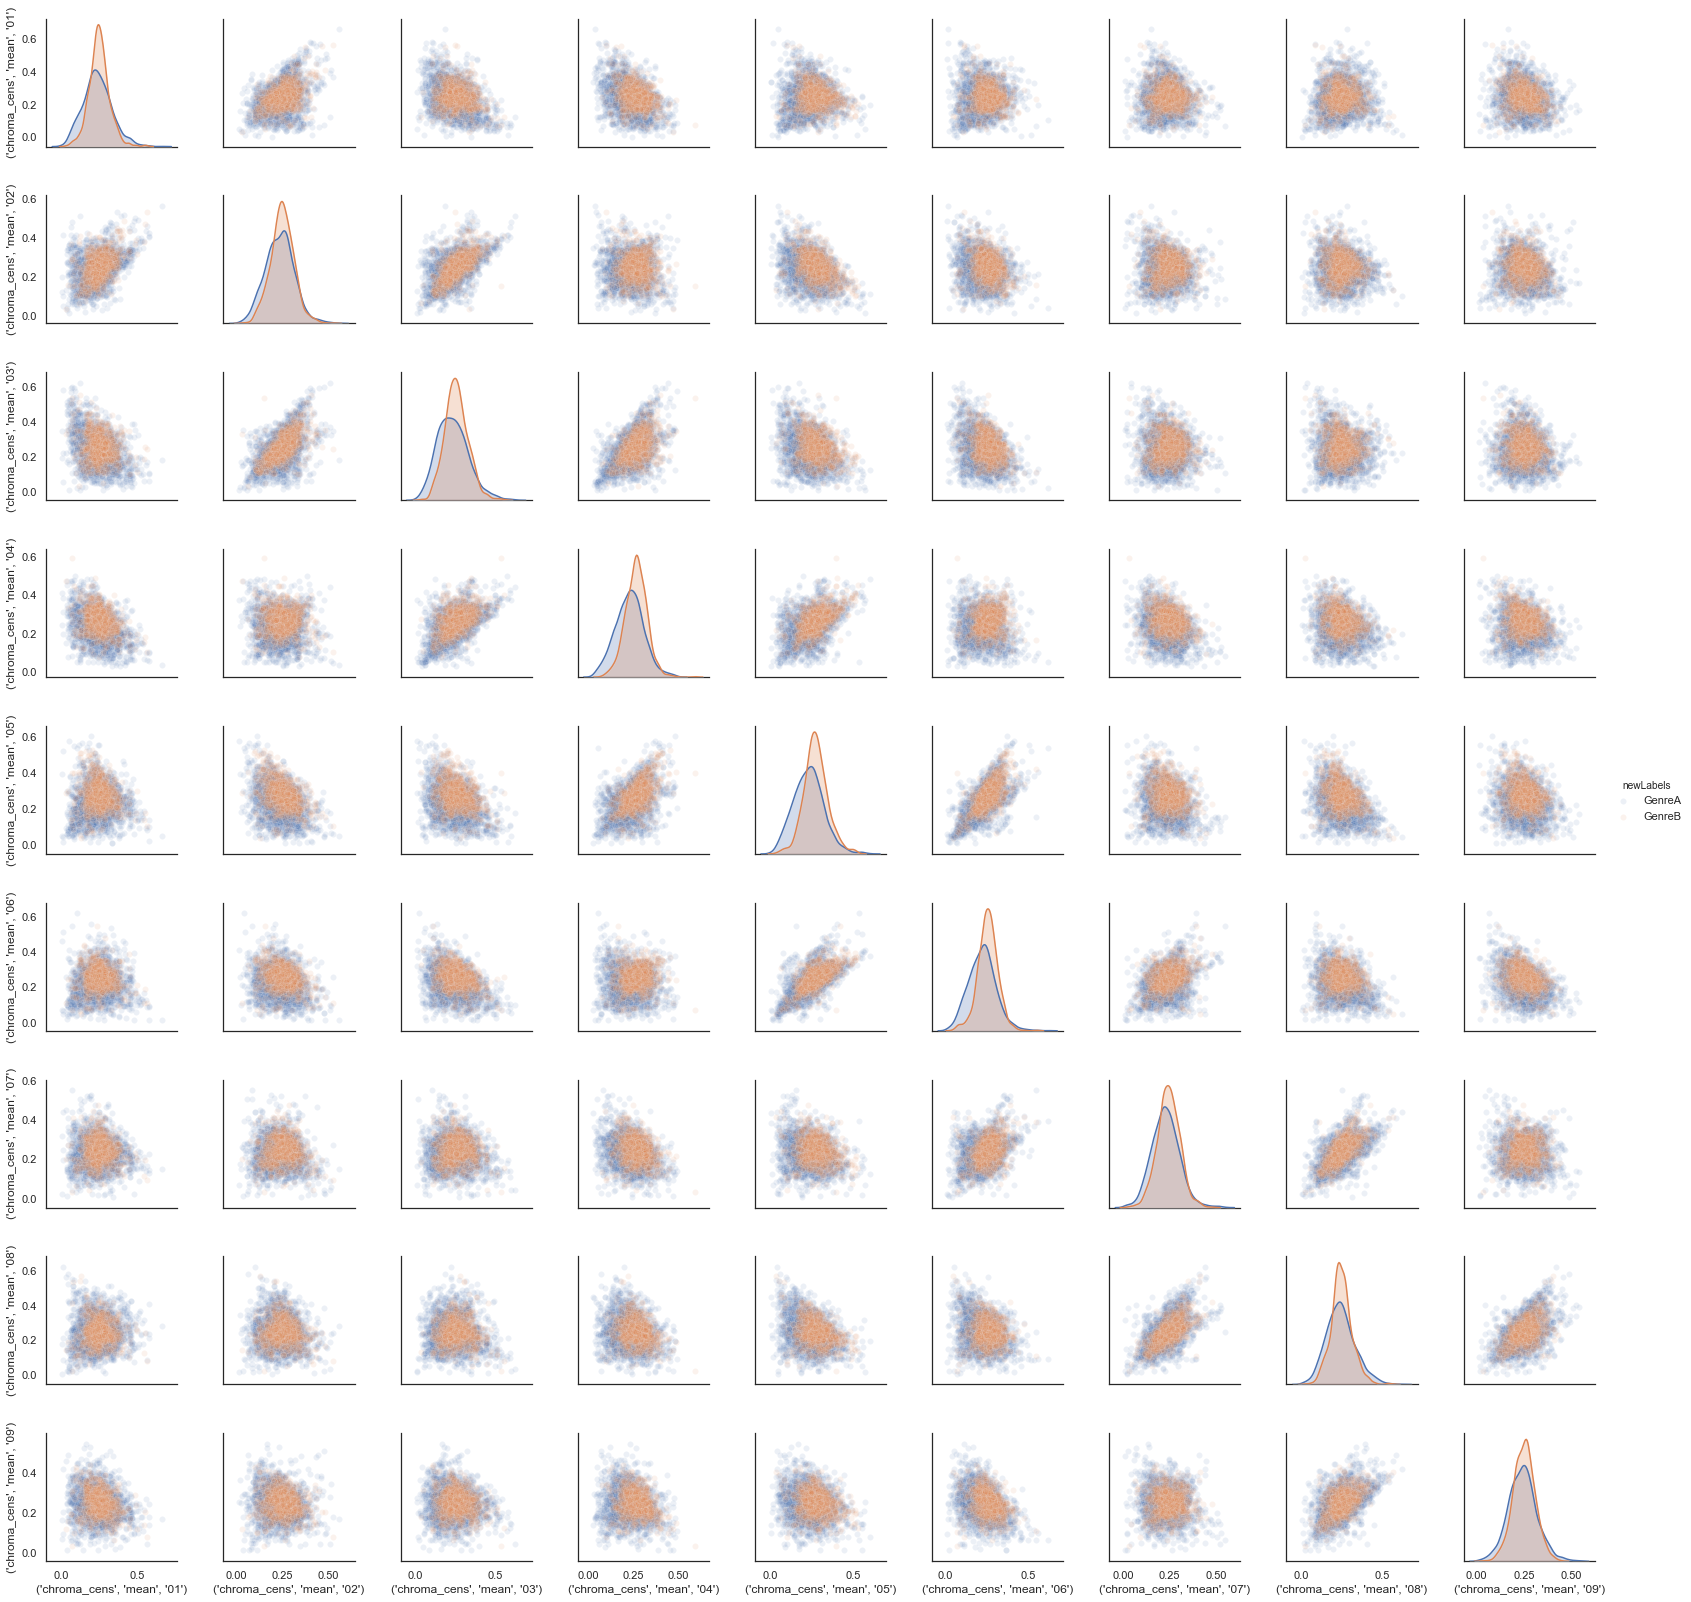

In [10]:
#Only one class
oneClass = chromaFeat.loc[(chromaFeat['newLabels'] == 'GenreA') | (chromaFeat['newLabels'] == 'GenreB')]
sns.pairplot(oneClass, hue='newLabels', plot_kws={'alpha':0.1})

# Plot using chroma and mfccs

In [35]:

#get chroma means
chroma = features[('chroma_cens', 'mean')]
#get mfcc means
mfcc = features[('mfcc', 'mean')]

#only use the first four windows for each
chroma = chroma.loc[:,'01':'04']
mfcc = mfcc.loc[:, '01':'04']

#merge them together
merged_df = reader.mergeFrames(chroma, mfcc)
#add the labels column
merged_df['labels'] = features['newLabels']

(8000, 12)


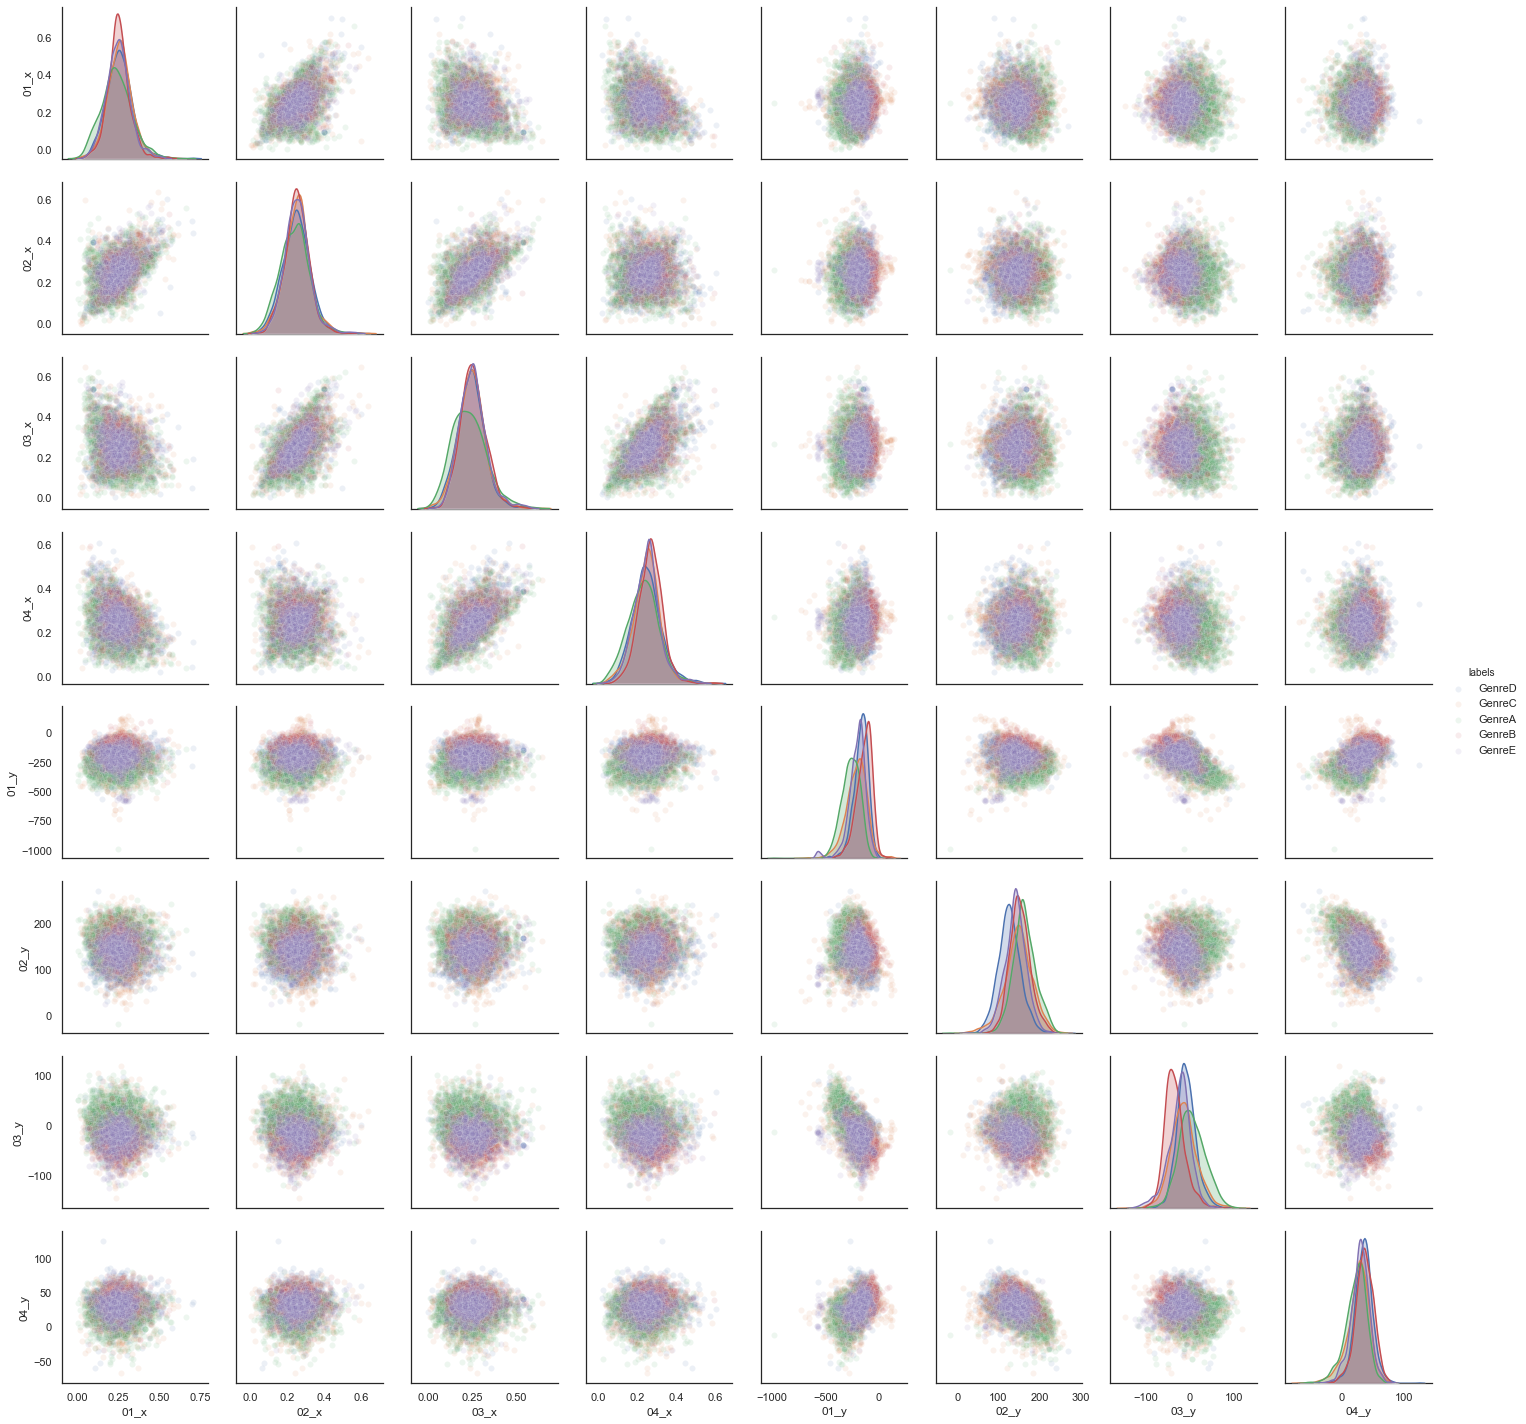

In [29]:
#using all Gernes
sns.pairplot(merged_df, hue='labels', plot_kws={'alpha':0.1})


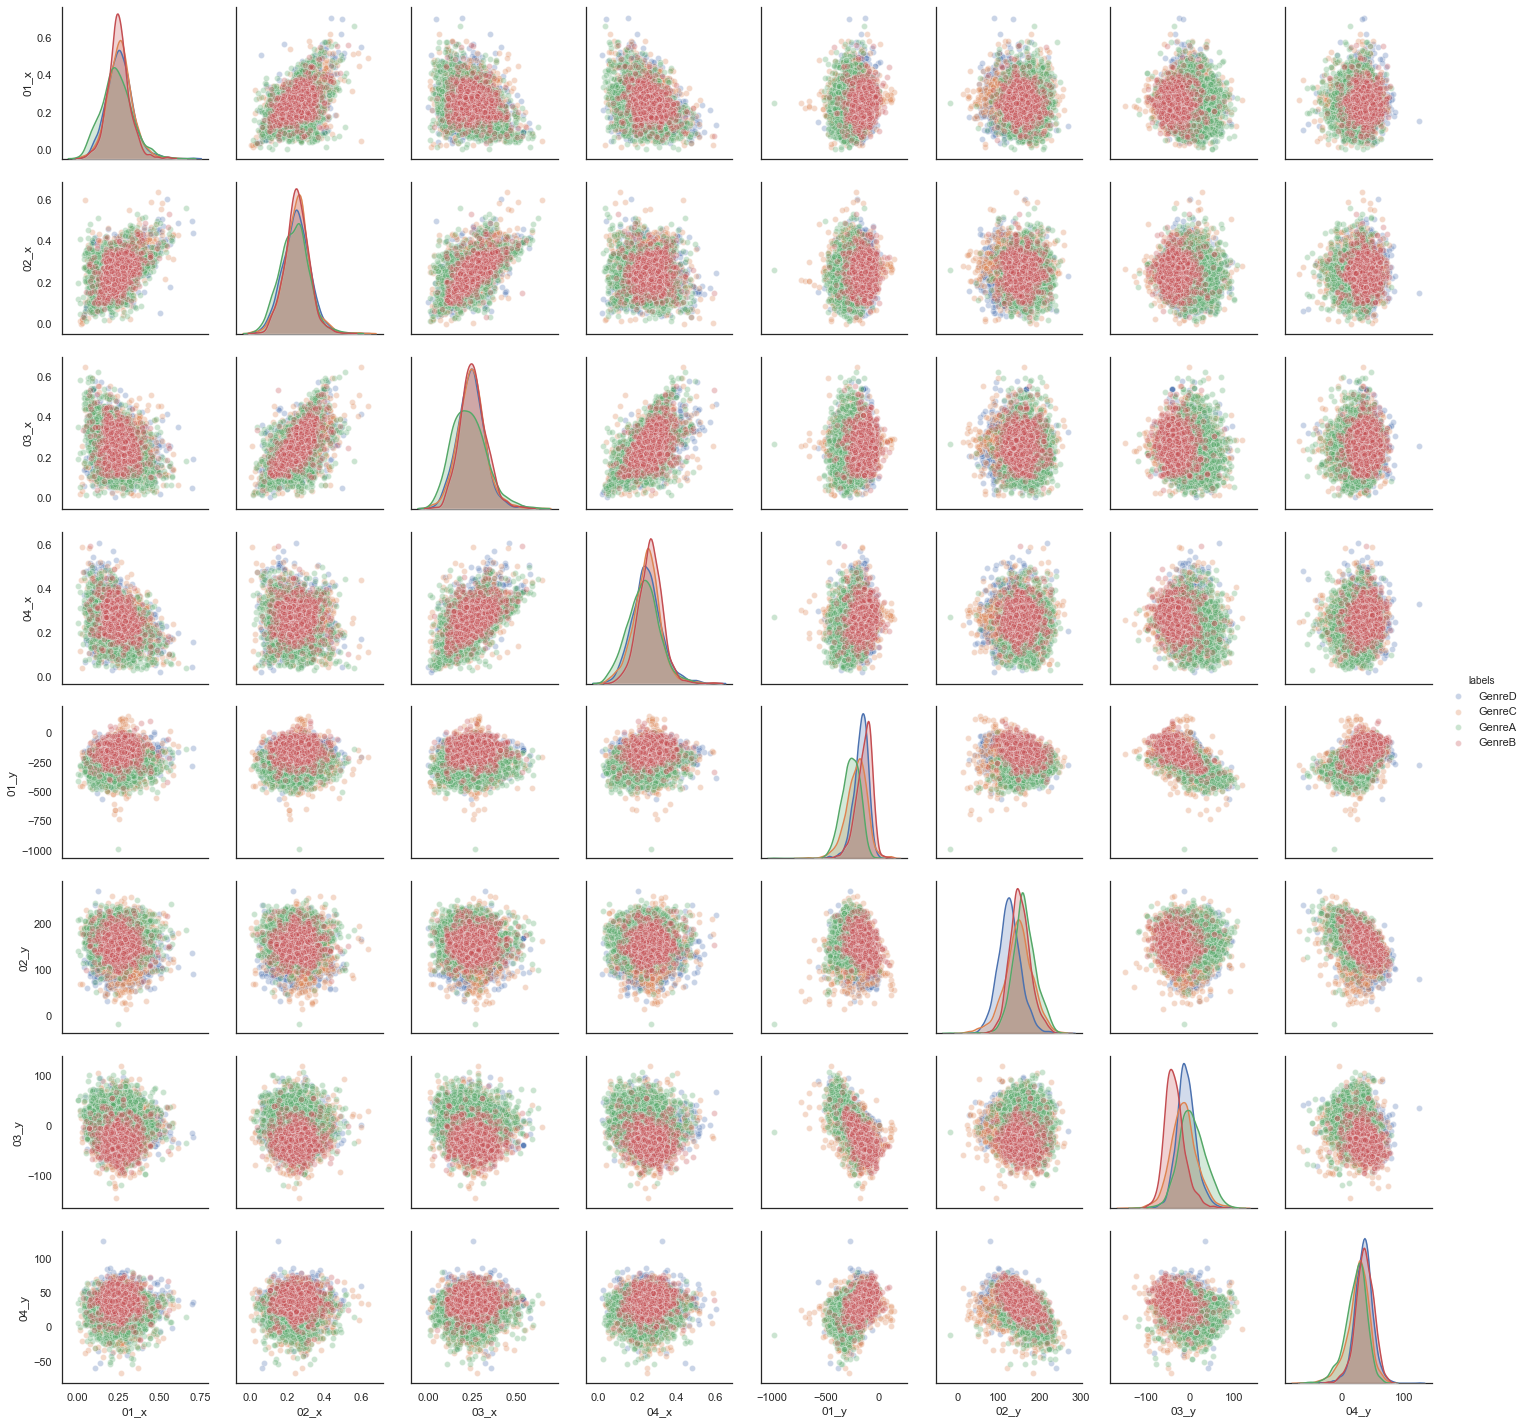

In [32]:
#Without GenreE
noE = merged_df.loc[merged_df['labels'] != 'GenreE']
sns.pairplot(noE, hue='labels', plot_kws={'alpha':0.3})


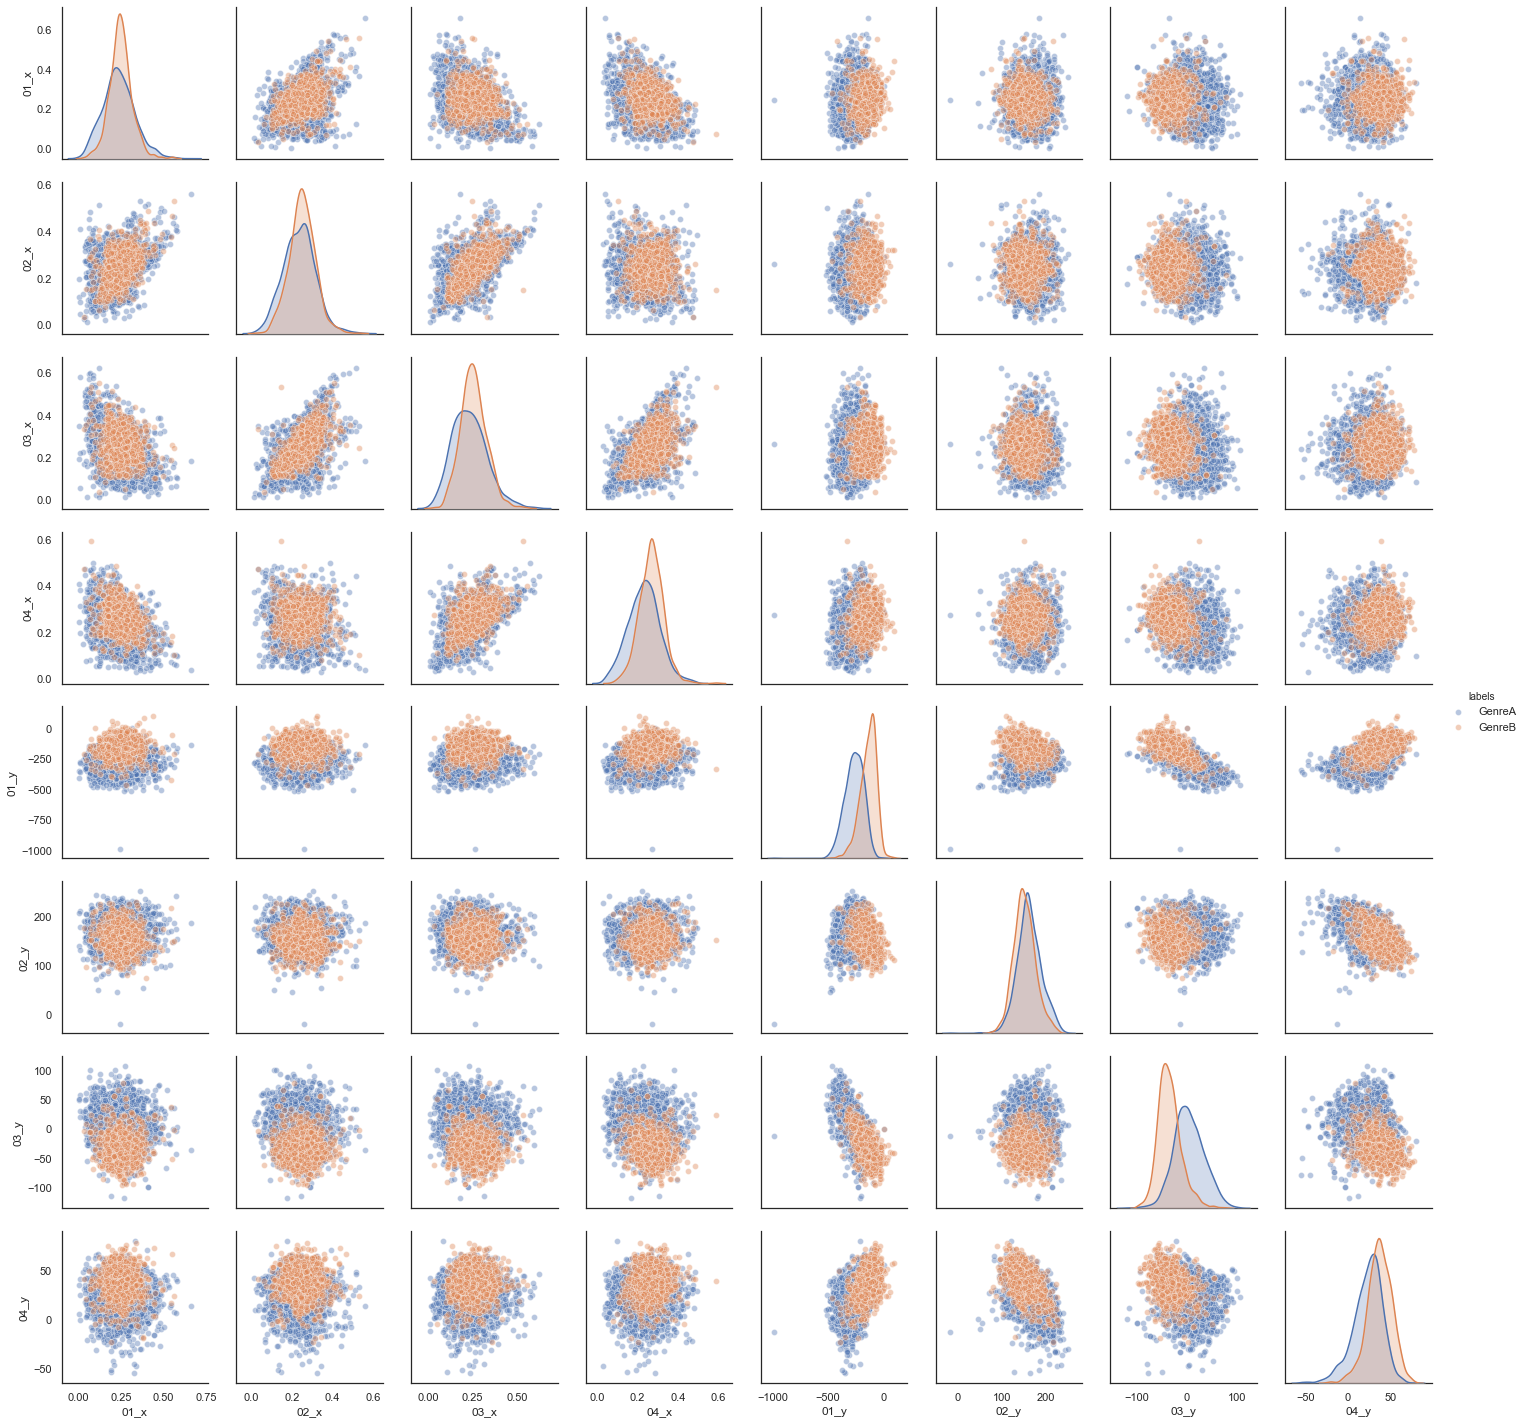

In [33]:
#Only looking at two Labels GenreA and GenreB seem like least similar genres
twoClass = merged_df.loc[(merged_df['labels'] == 'GenreA') | (merged_df['labels'] == 'GenreB')]
sns.pairplot(twoClass, hue='labels', plot_kws={'alpha':0.4})